In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from times_L_8 import new_means as new_times_ff
old_times = [2e-4,4.2e-4,4.9e-4,6.1e-4,8.4e-4,13e-4,21e-4,38e-4,76e-4,15.5e-3,
             32e-3,68e-3,13e-2,26e-2,54e-2,1.08,38.5]

old_times = np.array(old_times)
new_times = np.array(new_times_ff)
diff = (old_times - new_times) 
#print(old_times)
#print(diff)

print("Overall times: old vs new ", np.sum(old_times), np.sum(new_times))
print("\nold times k=15,16,17 : ", old_times[-6:] , "\nnew times k=15,16,17 : ", new_times[-6:])
speedup_factor = np.sum(old_times) / np.sum(new_times)
print("\nSpeedup factor: ", speedup_factor)
print("Expected future iterations: ", 1_600 * speedup_factor)

Overall times: old vs new  40.64286 7.542286827586912

old times k=15,16,17 :  [ 0.068  0.13   0.26   0.54   1.08  38.5  ] 
new times k=15,16,17 :  [0.12235823 0.14635669 0.4517815  0.56260236 2.11806368 3.98552775]

Speedup factor:  5.38866539142258
Expected future iterations:  8621.864626276129


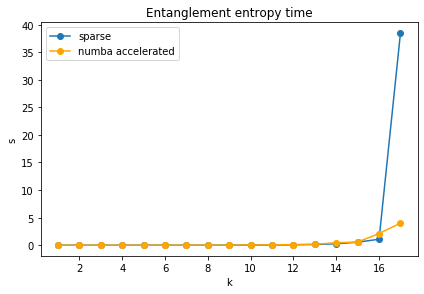

<Figure size 432x288 with 0 Axes>

In [11]:
plot(range(1,len(old_times) + 1), old_times, '-o', label= 'sparse')
plot(range(1,len(old_times) + 1), new_times, '-o', label= 'numba accelerated',color='orange')

legend()

xlabel('k')
ylabel('s')
tight_layout()
title("Entanglement entropy time")
show()
savefig("Numba_vs_sparse_time", dpi=300)

In [14]:
constr_m = []
eigh_m = []
constr_std = []
eigh_std = []

from constr_vs_eig_times_L_5 import *
constr_m.append(constr_means)
eigh_m.append(eigh_means)
constr_std.append(constr_stds)
eigh_std.append(eigh_stds)

from constr_vs_eig_times_L_6 import *
constr_m.append(constr_means)
eigh_m.append(eigh_means)
constr_std.append(constr_stds)
eigh_std.append(eigh_stds)

from constr_vs_eig_times_L_7 import *
constr_m.append(constr_means)
eigh_m.append(eigh_means)
constr_std.append(constr_stds)
eigh_std.append(eigh_stds)

from constr_vs_eig_times_L_8 import *
constr_m.append(constr_means)
eigh_m.append(eigh_means)
constr_std.append(constr_stds)
eigh_std.append(eigh_stds)


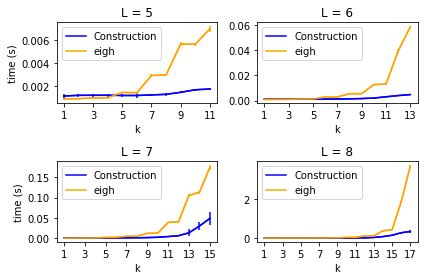

In [39]:
fig, axes = subplots(2,2)
for i,ax in enumerate(axes.flatten()):
    x = range(1,len(constr_m[i]) + 1)
    y = constr_m[i]
    ax.plot(x, y, '-', color='blue', label='Construction')
    ax.set_xticks(x[::2])
    ax.errorbar(x,y, yerr=constr_std[i], color='blue')
    
    y = eigh_m[i]
    ax.plot(x, y, '-', color='orange', label='eigh')
    ax.set_xticks(x[::2])
    ax.errorbar(x,y, yerr=eigh_std[i], color='orange')
    
    
    ax.legend()
    ax.set_title("L = " + str(i+5))
    tight_layout()
    if not i % 2: ax.set_ylabel("time (s)")
    ax.set_xlabel("k")


savefig("Construction_eigh_time_GPU", dpi=300)